In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [46]:
from sklearn.metrics import r2_score

In [47]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

data = pd.DataFrame(housing.data,columns=housing.feature_names)
data['target'] = housing.target

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [48]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [49]:
print(data.isnull().sum())   #data is already cleaned so no need

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [50]:
X = data.drop('target',axis=1)
y = data['target']

/var/folders/tk/q3899yg13s1406xgfmqz57qc0000gn/T/ipykernel_6205/962542366.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


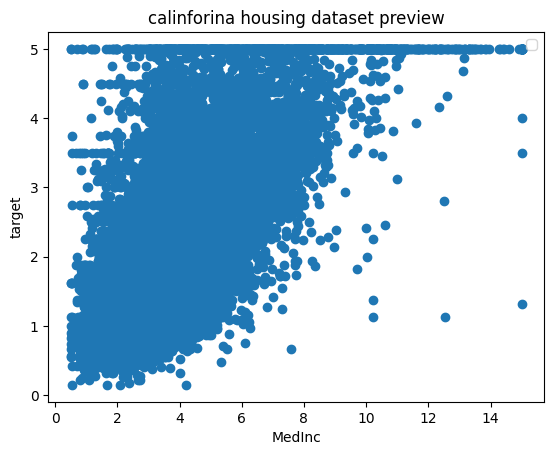

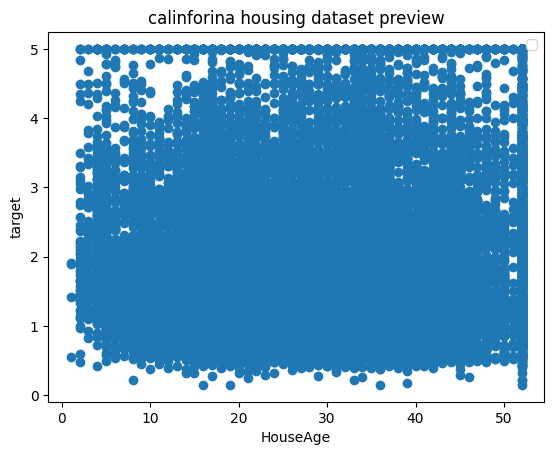

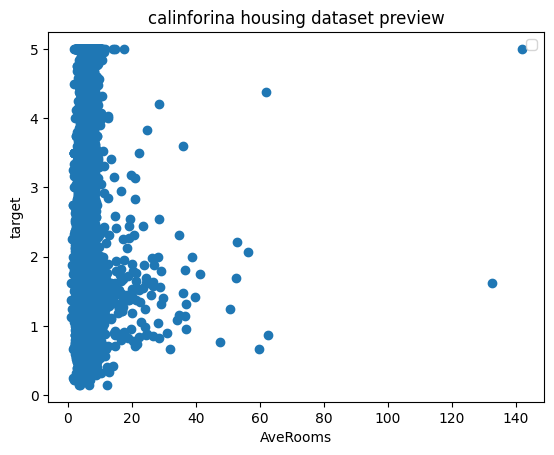

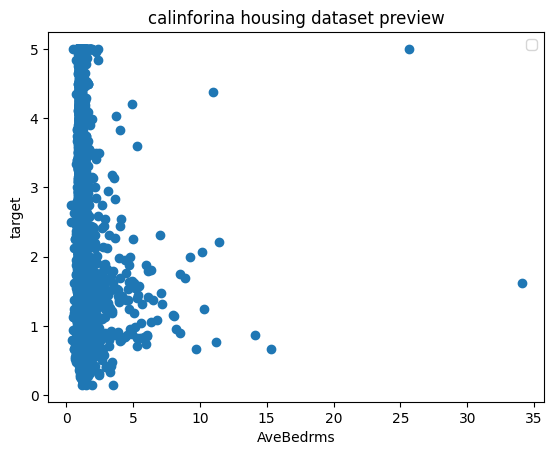

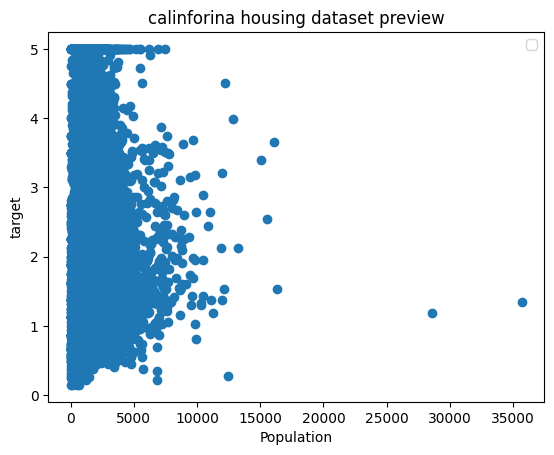

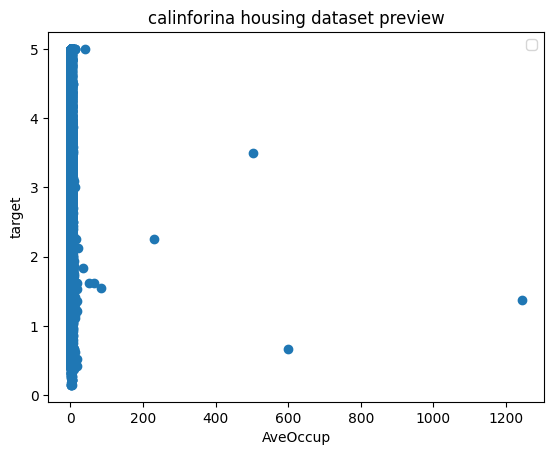

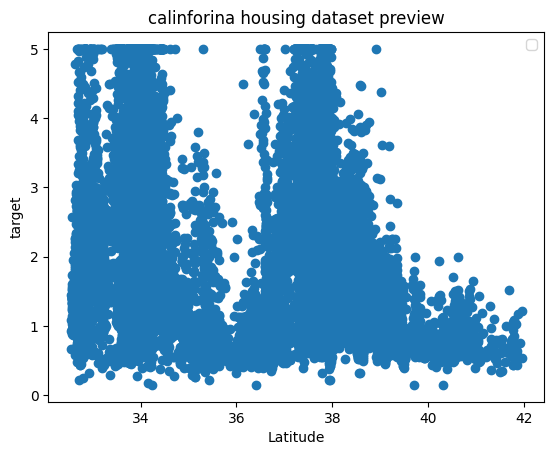

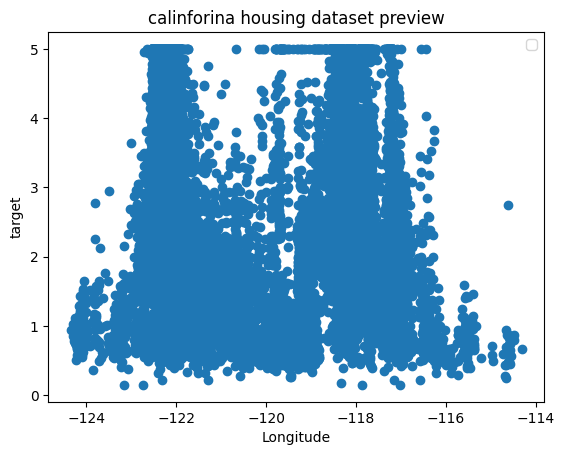

In [52]:
for column in X.columns:
    plt.scatter(X[column],y)
    plt.xlabel(column)
    plt.ylabel('target')
    plt.title("calinforina housing dataset preview")
    plt.legend()
    plt.show();

In [53]:
print(X.shape,y.shape)

(20640, 8) (20640,)


In [54]:
#splitting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
print(X_train.shape,X_valid.shape)

(16512, 8) (4128, 8)


In [56]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

In [ ]:
# import pandas as pd
# df_train = pd.DataFrame(X_train_pca)
# df_train['cluster'] = X_train_clustered
# df_train['target'] = y_train  # Assuming y_train exists

# print(df_train.groupby('cluster')['target'].mean())  # Do clusters differentiate the target?


cluster
0    2.041071
1    2.055246
2    2.010349
3    2.015009
4    1.636000
5    1.939347
6    2.024574
7    1.686000
Name: target, dtype: float64


In [ ]:
# from sklearn.cluster import KMeans
# kmn = KMeans(n_clusters=8, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0,
#               random_state=None, copy_x=True, algorithm='lloyd')

# kmn.fit(X_train_pca)
# X_train_clustered = kmn.predict(X_train_pca)
# X_valid_clustered = kmn.predict(X_valid_pca)

# X_train_final = np.column_stack((X_train_pca,X_train_clustered))
# X_valid_final = np.column_stack((X_valid_pca,X_valid_clustered))


In [84]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)  
X_train_best = selector.fit_transform(X_train_scaled, y_train)
X_valid_best = selector.transform(X_valid_scaled)


/Users/vivektripathi/Desktop/machineLearning/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [73]:
#loading the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [85]:
lr.fit(X_train_best,y_train)

LinearRegression()

In [86]:
ypreds = lr.predict(X_valid_best)
r2_score(y_valid,ypreds)

0.575787706032451

In [87]:
#using stochastic Gradient Descent

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(
    loss='squared_error',
    max_iter=1000,          
    learning_rate='invscaling',  
    eta0=0.01,              
    power_t=0.25,          
    tol=1e-4,               
    random_state=42        
)
sgd.fit(X_train_best, y_train)
ypreds_sgd = sgd.predict(X_valid_best)
print("SGD Regressor R²:", r2_score(y_valid, ypreds_sgd))

print("SGD Iterations:", sgd.n_iter_)

SGD Regressor R²: 0.5798267665069695
SGD Iterations: 6


In [77]:
import sklearn
print(sklearn.__version__)  


1.6.1


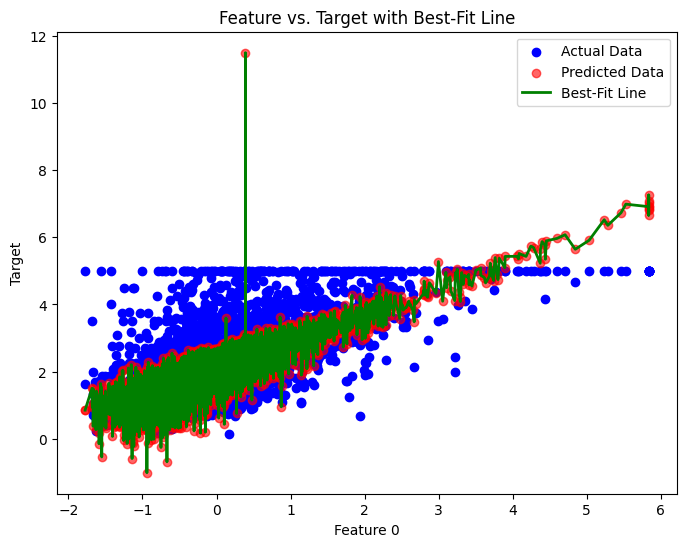

In [90]:
import numpy as np

feature_index = 0 
X_feature = X_valid_best[:, feature_index]  

plt.figure(figsize=(8, 6))
plt.scatter(X_feature, y_valid, color='blue', label='Actual Data')
plt.scatter(X_feature, ypreds, color='red', label='Predicted Data', alpha=0.6)

# Best-fit line
sorted_indices = np.argsort(X_feature)
plt.plot(X_feature[sorted_indices], ypreds[sorted_indices], color='green', linewidth=2, label="Best-Fit Line")

plt.xlabel(f"Feature {feature_index}")
plt.ylabel("Target")
plt.title("Feature vs. Target with Best-Fit Line")
plt.legend()
plt.show()
